In [28]:
using LinearAlgebra
using Nemo
using Groebner
using Symbolics
using Latexify
using Makie
using CairoMakie

In [29]:

figure = Figure()

ax = Axis(figure[1, 1], xlabel = "x values", ylabel = "y values",)
restart_axis() = Axis(figure[1, 1], xlabel = "x values", ylabel = "y values",)


restart_axis (generic function with 1 method)

# Infinite Limits and Limits at Infinity

## Definitions and Theorems:

**slope of the graph of the function:**

In [116]:
@variables c d dy dx f m x y y′ D P Δx Δy lim(..) f(..) f′(..) g(..);

In [31]:
xs = Symbolics.variables(:x, 1:2);
ys = Symbolics.variables(:y, 1:2);

In [32]:
fx(x) = abs(x - 2)

fx (generic function with 1 method)

In [33]:
lim(fx(x) - f(c) // x - 2, x ~ 2)

lim(-2 + abs(-2 + x) + (-f(c)) / x, x ~ 2)

In [34]:
substitute(lim(fx(x) - f(c) // x - 2, x ~ 2), Dict(x => 1, c => 2))

lim(-1 - f(2), 1 ~ 2)

In [35]:
P = (c, f(c))

(c, f(c))

In [36]:
m ~ lim(f(x) - f(c) // x - c, x ~ c)

m ~ lim(-c + f(x) + (-f(c)) / x, x ~ c)

**slope**

In [37]:
x ~ c + Δx, x - c ~ Δx

x ~ (c + Δx, -c + x) ~ Δx

In [38]:
m ~ lim(f(x + Δx) - f(x) // Δx, Δx ~ 0)

m ~ lim((-f(x)) / Δx + f(x + Δx), Δx ~ 0)

**derivative**

In [39]:
f′(x) ~ lim(f(x + Δx) - f(x) // Δx, Δx ~ 0)

f′(x) ~ lim((-f(x)) / Δx + f(x + Δx), Δx ~ 0)

**Differentiability implies continuity theorem:**

If f is continuous at x = c

In [40]:
f(x) ~ x ~ c 

f(x) ~ x ~ c

**Notations:**

In [41]:
y ~ f(x), f′(x), dy//dx, y′, [d//dx,[f(x)]], [D,([y])]

y ~ (f(x), f′(x), dy / dx, y′, Any[d / dx, Num[f(x)]], Any[D, Num[y]])

## Example 1: 

Finding the Derivative by the Limit Process

In [42]:
f(x) ~ x^3

f(x) ~ x^3

In [43]:
fx(x) = x^3;

In [44]:
expr = fx(x + Δx) - fx(x) // Δx

(-(x^3)) / Δx + (x + Δx)^3

In [45]:
expr1 = expand(expr)

(-(x^3)) / Δx + x^3 + 3(x^2)*Δx + 3x*(Δx^2) + Δx^3

In [46]:
expr2 = simplify(expr1)

(-(x^3) + (x^3)*Δx + 3(x^2)*(Δx^2) + 3x*(Δx^3) + Δx^4) / Δx

In [62]:
eq = -x^3 + x^3Δx + 3Δx^2*x^2 + 3Δx^3*x + Δx^4 ~  6Δx^4 + Δx^4 + Δx^4

x^(3Δx) - (x^3) + 3(x^2)*(Δx^2) + 3x*(Δx^3) + Δx^4 ~ 8(Δx^4)

In [82]:
 expr3 = -x^3 + 6Δx^4 + Δx^4 + Δx^4 

-(x^3) + 8(Δx^4)

In [93]:
eq2 = 8Δx^4 - x^3 ~ x^3 * (8Δx - 1)

-(x^3) + 8(Δx^4) ~ (x^3)*(-1 + 8Δx)

In [84]:
symbolic_solve(expr3)

┌ Warning: Infinite number of solutions
└ @ SymbolicsGroebnerExt /Users/kabuquecisouzaalves/.julia/packages/Symbolics/YbNrd/ext/SymbolicsGroebnerExt.jl:228
┌ Info: Assuming ((1//16)*√((-32//1)*(x^3))) != 0
└ @ Symbolics /Users/kabuquecisouzaalves/.julia/packages/Symbolics/YbNrd/src/solver/univar.jl:93


4-element Vector{Any}:
 Dict{Num, Any}(Δx => (1//2)*√((1//8)*√(-32(x^3))) - (1//2)*√((-1//8)*√(-32(x^3))), x => x)
 Dict{Num, Any}(Δx => (1//2)*√((1//8)*√(-32(x^3))) + (1//2)*√((-1//8)*√(-32(x^3))), x => x)
 Dict{Num, Any}(Δx => -(1//2)*√((1//8)*√(-32(x^3))) - (1//2)*√((-1//8)*√(-32(x^3))), x => x)
 Dict{Num, Any}(Δx => -(1//2)*√((1//8)*√(-32(x^3))) + (1//2)*√((-1//8)*√(-32(x^3))), x => x)

In [81]:
gcd(8, 1)

1

In [94]:
substitute(eq ~ eq, Dict(x => 1, Δx => 0))

0 ~ 0 ~ 0 ~ 0

In [98]:
expand(x^3 * (8Δx - 1) / Δx)

(-(x^3) + 8(x^3)*Δx) / Δx

In [117]:
symbolic_solve(f(x + Δx) - f(x) // Δx)

AssertionError: AssertionError: All variables should be Nums or BasicSymbolics

In [246]:
@syms x::Real c::Real Δx::Real;
@syms f(..)::Real;

In [247]:
substitute(f(x + Δx) - f(x) // Δx, Dict(x => 1, Δx => 1, f => x -> x))

1.0

In [248]:
data = map(y -> limit(substitute(f(x + Δx) - f(x) // Δx, Dict(x => y, Δx => y, f => x -> x)), Δx, 0), 1:10)

10-element Vector{Float64}:
  1.0
  3.0
  5.0
  7.0
  9.0
 11.0
 13.0
 15.0
 17.0
 19.0

increasing by 2 factor.

In [249]:
diff(data)

9-element Vector{Float64}:
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0

We use the factor and plug to the equation to get the limit:

In [250]:
limit(substitute(f(x + Δx) - f(x) // Δx, Dict(x => 2, Δx => 2, f => x -> x)), Δx, 0)

3.0

## Example 2: 

A Graph with a Sharp Turn

In [251]:
fx(x) = abs(x - 2);

In [252]:
data = map(x -> fx(x), 1:10)

10-element Vector{Int64}:
 1
 0
 1
 2
 3
 4
 5
 6
 7
 8

**Maping a function many range steps is the same as maping its limit.**

In [253]:
map(y -> limit(substitute(fx(x), Dict(x => y)), x, 0), 1:10) ~ data

[1, 0, 1, 2, 3, 4, 5, 6, 7, 8] ~ [1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

In [254]:
diff(data)

9-element Vector{Int64}:
 -1
  1
  1
  1
  1
  1
  1
  1
  1

In [291]:
data = map(y ->  substitute(f(x) - f(c) // x - c, Dict(x => y, c => 2, f => x -> x, f => c -> c)), -10:10)

21-element Vector{Float64}:
 -11.8
 -10.777777777777779
  -9.75
  -8.714285714285715
  -7.666666666666667
  -6.6
  -5.5
  -4.333333333333334
  -3.0
  -1.0
   ⋮
  -1.0
   0.3333333333333335
   1.5
   2.5999999999999996
   3.666666666666667
   4.714285714285714
   5.75
   6.777777777777779
   7.800000000000001

In [281]:
limit(substitute(f(x) - f(c) // x - c, Dict(x => 1, c => 1, f => x -> x, f => c -> c)), x ~ 0)

MethodError: MethodError: no method matching limit(::Float64, ::Equation)
The function `limit` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  limit(::Any, ::Any, !Matched::Any, !Matched::Any...)
   @ Symbolics ~/.julia/packages/Symbolics/YbNrd/src/limits.jl:20


In [303]:
limits!(0, 4pi)
lines(data)


ErrorException: Invalid xlims length of 1, must be 2.

## Example 3: 

A Graph with a Vertical Tangent Line

In [314]:
f(x) ~ x^1//3

f(x) ~ (1//3)*x

Is this function differenciable at (0,0)?

In [316]:
fx(x) = f(x) - f(c) // x - c;

In [318]:
limit(substitute(fx(x), Dict(x => 0, c => 0, f => x -> x, f => c -> c)), x, 0)

NaN

In [351]:
m = 1 // x^2//3

(1//3) / (x^2)

Is not differenciable at P = (0, 0)!

In [386]:
data_fx = map(y -> limit(substitute(fx(x), Dict(x => y + 1, c => y , f => x -> x, f => c -> c)), x, 0), 0:100);
data_m = map(y -> limit(substitute(m, Dict(x => y + 1, c => y , f => x -> x, f => c -> c)), x, 0), 0:100);

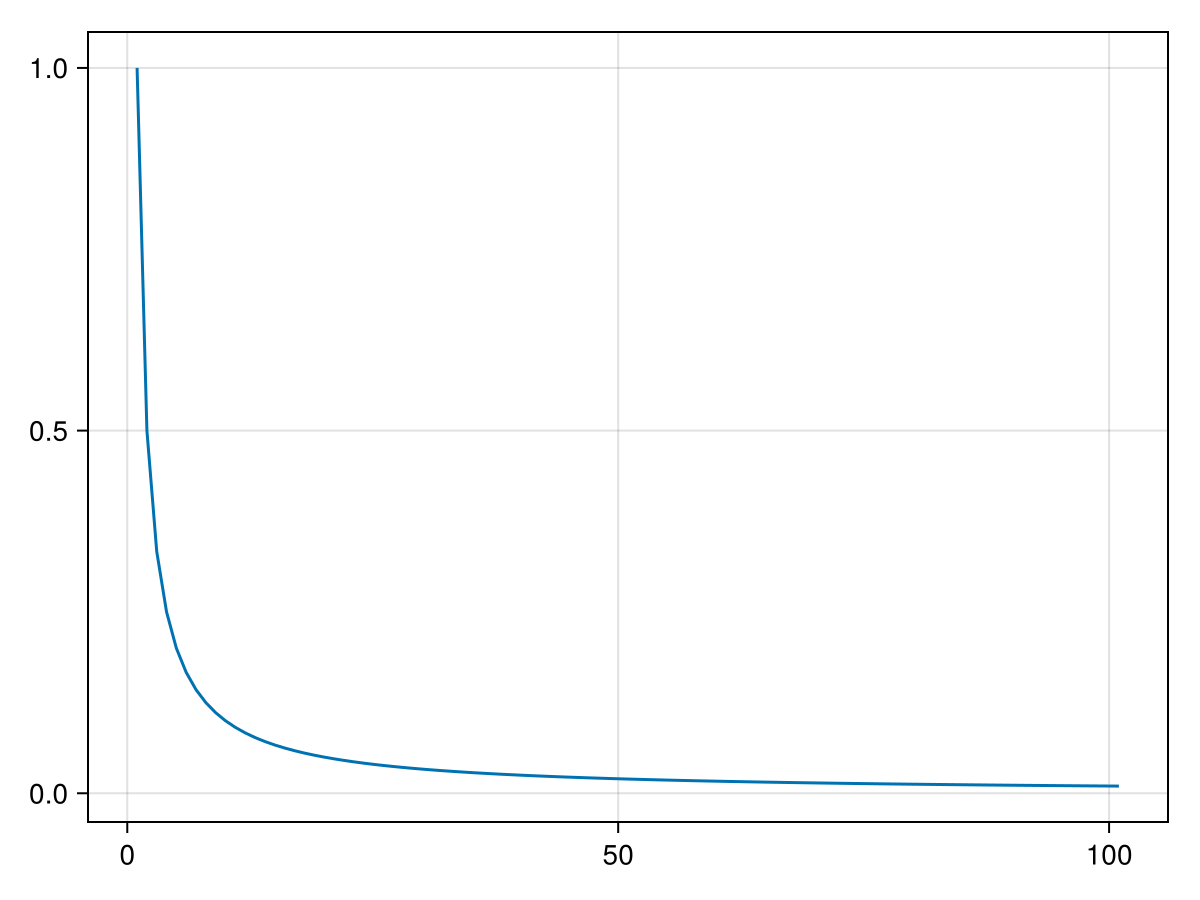

In [387]:
lines(data_fx)

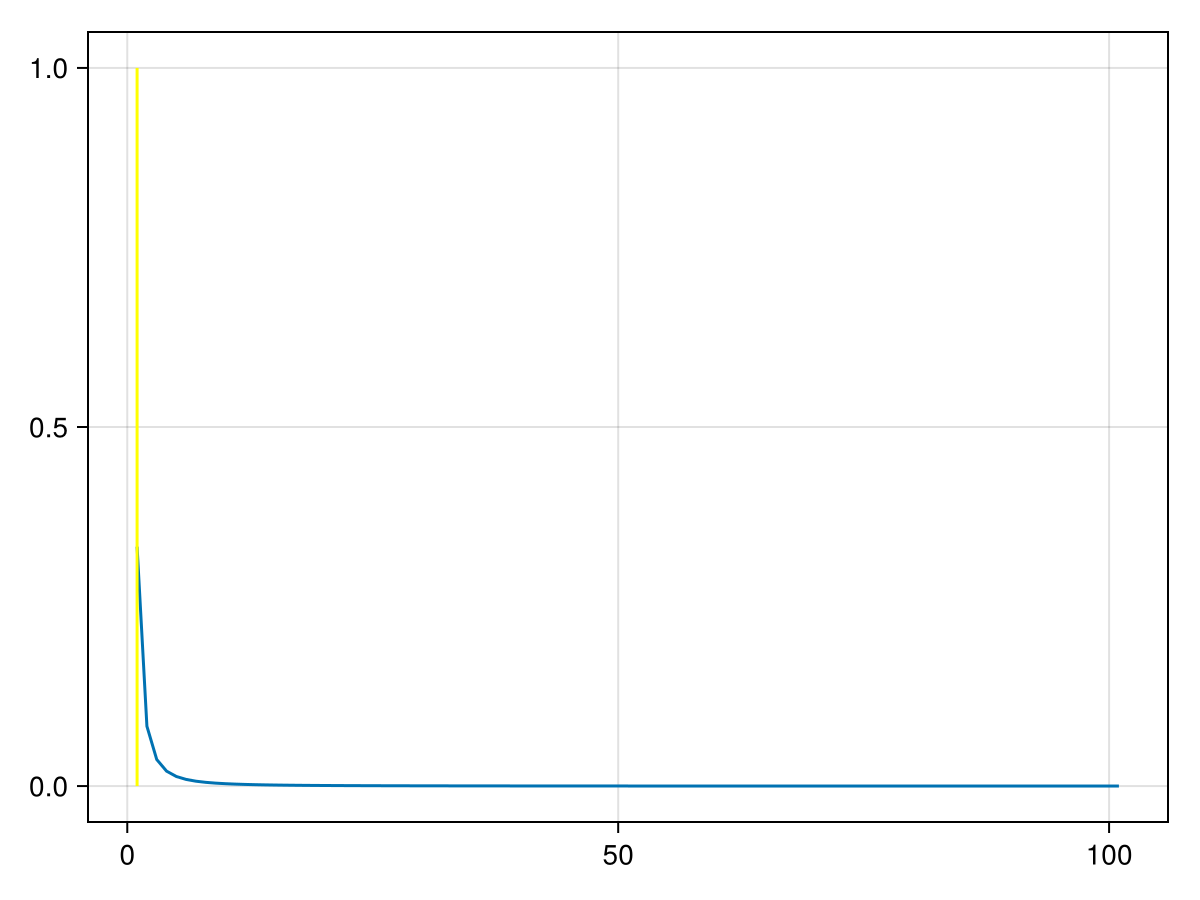

In [410]:
lines(data_m)
linesegments!([0 + 1], 0:1, color= :yellow)
current_figure()
